# **Product Clustering with P2V and CooccurencePrinter**

In [1]:
import numpy as np
import pandas as pd
import Utils
from P2V import P2VDataLoader, P2VModel
from CooccurencePrinter import CooccurencePrinter

### Load Basket Data

In [9]:
#---------------------- load basket data ----------------------#
def get_basket_data(config):
    input_path = config['input']['path']
    baskets = pd.read_parquet(f'{input_path}baskets.parquet')
    baskets['basket'] = baskets.groupby(['week', 'shopper']).ngroup()
    return baskets
    
config = Utils.read_json('../config.json')
baskets = get_basket_data(config)

### P2V - Product Categories

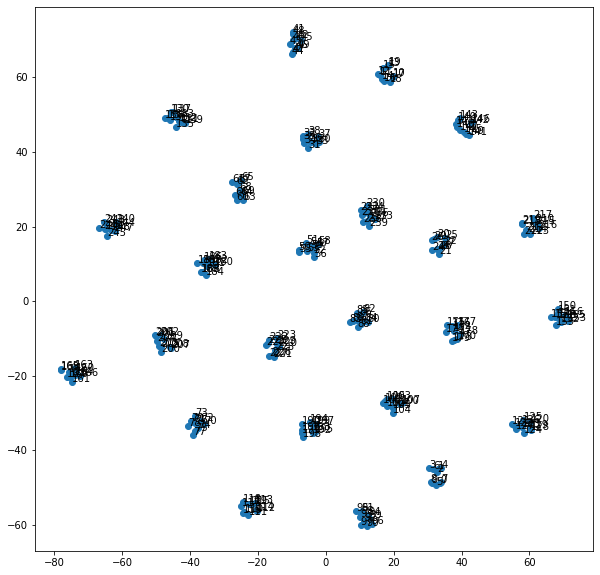

In [4]:
p2v_data_loader = P2VDataLoader(baskets)

p2v_config = {
    'baskets': p2v_data_loader.output,
    'embedding_dimensions': 100
}

p2v_model = P2VModel(**p2v_config)
p2v_model.tsne_plot(figsize=(10,10))

In [10]:
# example to see products in same category (100-109)
p2v_model.most_similar_products('100')

[('107', 0.6237015724182129),
 ('106', 0.5674802660942078),
 ('101', 0.5567404627799988),
 ('103', 0.5385676026344299),
 ('105', 0.5322760939598083),
 ('104', 0.5136589407920837),
 ('102', 0.48579567670822144),
 ('109', 0.4644067585468292),
 ('108', 0.4608612060546875),
 ('181', 0.30500003695487976)]

### CooccurencePrinter - Product Categories

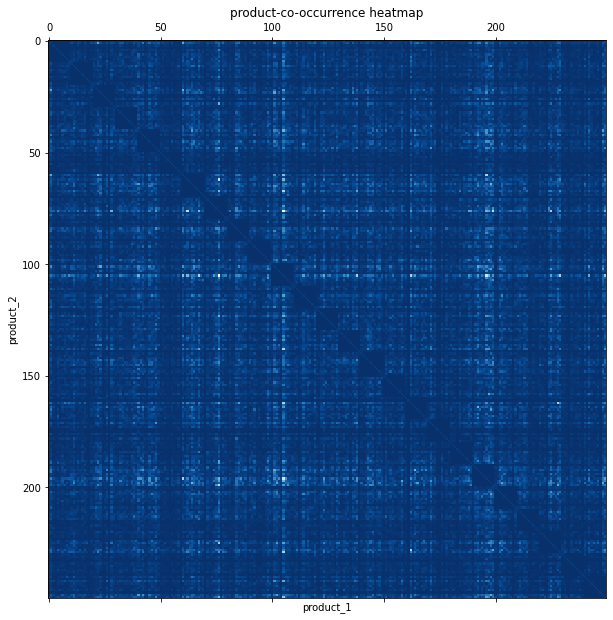

In [10]:
# find product categories (validating P2V)
product_cooccurence = CooccurencePrinter(baskets)
product_cooccurence.plot_heatmap()

### Add Product Categories to Basket Data

In [ ]:
# add eda derived product categories to basket data
def add_product_categories(baskets, steps):
    cut_bins = list(range(0, 251, steps))
    cut_labels = list(range(0, 25))
    baskets['product_cat'] = pd.cut(
        baskets['product'], 
        bins=cut_bins, 
        labels=cut_labels, 
        right=False
    )
    
    return baskets

eda_based_cat_size = 10
cat_baskets = add_product_categories(baskets, eda_based_cat_size)

### CooccurencePrinter - Product Category Clusters

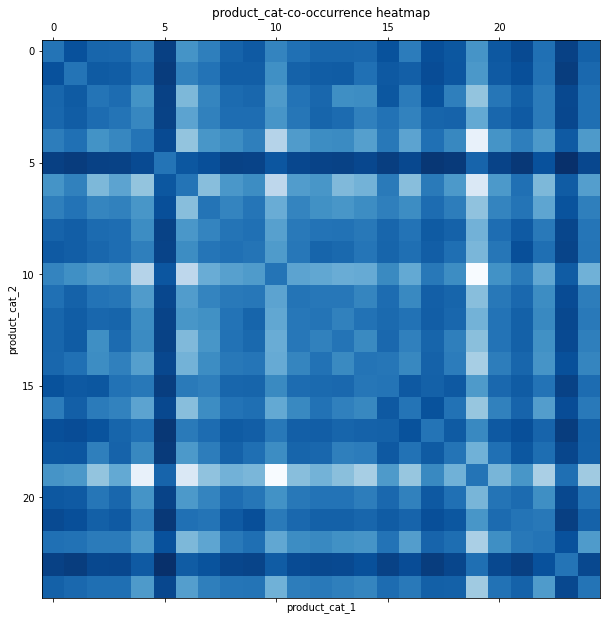

In [12]:
# find product category clusters
category_cooccurence = CooccurencePrinter(
    cat_baskets, 
    group_var="basket", 
    member_var="product_cat"
)

# plot ordered product category co-occurence heatmap
category_cooccurence.plot_heatmap()

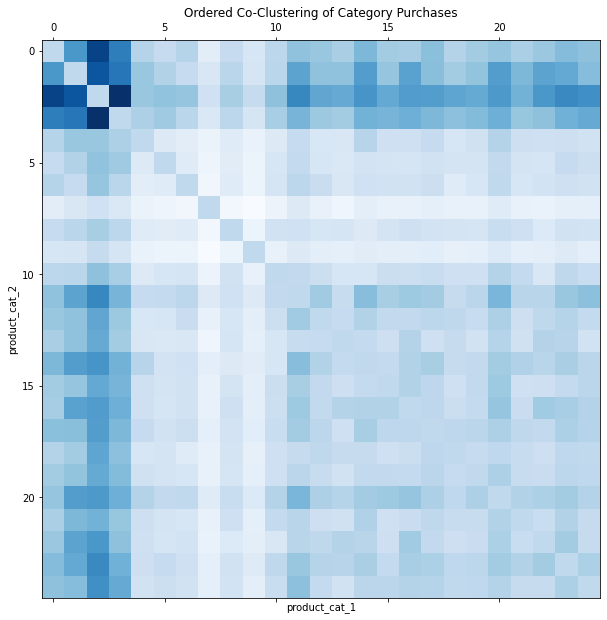

In [13]:
category_cooccurence.plot_ordered_heatmap()